In [1]:
def TPMs(df,col_len, log = True):
    '''converts raw counts table into tpms
    input table should contain a column with gene lengths named col_len'''

    # array with all gene lengths
    genes_len = df[col_len]

    # Step1: calculate Reads per Kilobase (normalize for gene length)
    rpks = df.drop(col_len, axis = 1).apply(lambda counts: ((counts+1)*1000)/genes_len)

    # Step 2: Calculate TPMs (normalize for sequencing depth)
    tpms = rpks.apply(lambda rpk: rpk*1e6 / sum(rpk))

    # Step 3: transform in logaritmic scale (optional)
    if log == True:
        tpms = np.log2(tpms)

    return tpms

In [2]:
#Teste
# importing packages
import numpy as np
import pandas as pd
import glob,os
import seaborn as sns
import matplotlib.pyplot as plt
#index_col=0 makes the first column the index 
data=pd.read_csv('./Thesis/human.gencode.v43.chr_patch_hapl_scaff.annotation.genes.bed',delimiter="\t",header=None,index_col=0)
data

,1,2,3,4,5
0,,,,,
chr1,11868,14409,ENSG00000290825.1,DDX11L2,+
chr1,12009,13670,ENSG00000223972.6,DDX11L1,+
chr1,14403,29570,ENSG00000227232.5,WASH7P,-
chr1,17368,17436,ENSG00000278267.1,MIR6859-1,-
chr1,29553,31109,ENSG00000243485.5,MIR1302-2HG,+
...,...,...,...,...,...
KI270734.1,72410,74814,ENSG00000276017.1,ENSG00000276017,+
KI270734.1,131493,137392,ENSG00000278817.1,ENSG00000278817,+
KI270734.1,138081,161852,ENSG00000277196.4,PRODH,-


In [3]:
data['length'] = data[2].sub(data[1])
data=data.reset_index()
data = data.drop([0, 1,2,4,5], axis=1)
data.columns =['Gene', 'col_len']
data

,Gene,col_len
0,ENSG00000290825.1,2541
1,ENSG00000223972.6,1661
2,ENSG00000227232.5,15167
3,ENSG00000278267.1,68
4,ENSG00000243485.5,1556
...,...,...
69217,ENSG00000276017.1,2404
69218,ENSG00000278817.1,5899
69219,ENSG00000277196.4,23771
69220,ENSG00000278625.1,106


In [4]:
df=pd.read_csv('./DGE/DGE_input.csv',delimiter=",")
df=df.set_index('Gene')
df= df.loc[~(df==0).all(axis=1)]
df=df.reset_index()
df

,Gene,SRR8758292,SRR8758293,SRR8758294,SRR8758295,SRR8758296,SRR8758297
0,ENSG00000227232.5,1,3,0,2,5,3
1,ENSG00000278267.1,0,2,1,2,1,1
2,ENSG00000243485.5,0,0,1,0,0,0
3,ENSG00000238009.6,1,0,3,0,0,0
4,ENSG00000268903.1,1,1,2,1,0,0
...,...,...,...,...,...,...,...
31141,ENSG00000198695.2,1573,1017,849,2056,1487,1094
31142,ENSG00000210194.1,9,3,1,6,7,5
31143,ENSG00000198727.2,70996,71687,74294,67837,61461,61820
31144,ENSG00000210195.2,104,124,122,101,371,153


In [5]:
result = pd.merge(data, df, how="inner", on=["Gene"])
result.columns = ['Gene', 'col_len', 'SRR8758292_FOXO1 Overexpression','SRR8758293_FOXO1 Overexpression','SRR8758294_FOXO1 Overexpression','SRR8758295_Control','SRR8758296_Control','SRR8758297_Control']
result=result.set_index('Gene')
result


,col_len,SRR8758292_FOXO1 Overexpression,SRR8758293_FOXO1 Overexpression,SRR8758294_FOXO1 Overexpression,SRR8758295_Control,SRR8758296_Control,SRR8758297_Control
Gene,,,,,,,
ENSG00000227232.5,15167,1,3,0,2,5,3
ENSG00000278267.1,68,0,2,1,2,1,1
ENSG00000243485.5,1556,0,0,1,0,0,0
ENSG00000238009.6,44429,1,0,3,0,0,0
ENSG00000268903.1,755,1,1,2,1,0,0
...,...,...,...,...,...,...,...
ENSG00000198695.2,525,1573,1017,849,2056,1487,1094
ENSG00000210194.1,69,9,3,1,6,7,5
ENSG00000198727.2,1141,70996,71687,74294,67837,61461,61820


In [6]:
TPMs(result,'col_len',log=True)

,SRR8758292_FOXO1 Overexpression,SRR8758293_FOXO1 Overexpression,SRR8758294_FOXO1 Overexpression,SRR8758295_Control,SRR8758296_Control,SRR8758297_Control
Gene,,,,,,
ENSG00000227232.5,-4.502496,-3.397529,-5.429924,-3.740314,-3.179099,-3.514931
ENSG00000278267.1,2.298690,3.988619,3.371261,4.060872,3.037124,3.286254
ENSG00000243485.5,-2.217474,-2.112507,-1.144902,-2.040254,-2.479040,-2.229909
ENSG00000238009.6,-6.053062,-6.948095,-4.980490,-6.875842,-7.314627,-7.065497
ENSG00000268903.1,-0.174180,-0.069213,0.483354,0.003039,-1.435746,-1.186616
...,...,...,...,...,...,...
ENSG00000198695.2,9.970199,9.446468,9.153870,10.533525,9.627572,9.434259
ENSG00000210194.1,5.599556,4.382595,3.350200,5.262203,5.016062,4.850155
ENSG00000198727.2,14.345540,14.464480,14.483619,14.457095,13.875911,14.133444


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale

In [8]:
# data with genes as rows and samples as columns
data = TPMs(result,'col_len',log=True)

# filter only top genes with highest variance
var_genes = data.var(axis = 1).sort_values(ascending = False)[:20000].index
data = data[data.index.isin(var_genes)]

# Center and Scale the data
scaled_data = scale(data.T)

# create PCA object and get coordinates for scaled_data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# create PCA matrix
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
pca_df = pd.DataFrame(pca_data, index=data.columns, columns=labels)

# create labels for plotting
pca_labels_vector = [name.split('_')[1] for name in pca_df.index]
pca_df['labels'] = pca_labels_vector

# show pca matrix
pca_df

,PC1,PC2,labels
SRR8758292_FOXO1 Overexpression,-91.195606,14.393895,FOXO1 Overexpression
SRR8758293_FOXO1 Overexpression,-83.869063,-20.158793,FOXO1 Overexpression
SRR8758294_FOXO1 Overexpression,-123.065256,-43.735430,FOXO1 Overexpression
SRR8758295_Control,45.107212,114.352581,Control
SRR8758296_Control,156.323475,-77.943363,Control
SRR8758297_Control,96.699238,13.091110,Control


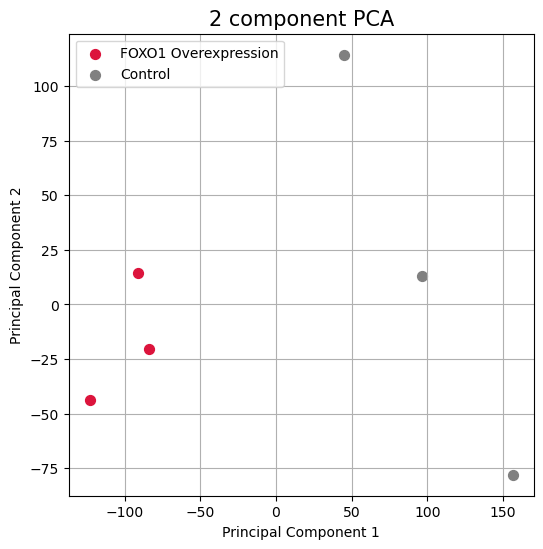

In [11]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 15)

targets = ['FOXO1 Overexpression', 'Control']
colors = ['crimson', 'grey']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['labels'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1']
               , pca_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig.savefig('PCA_ylabel_and_ylable=10.png', format='png', dpi=600)

In [10]:
pca.explained_variance_ratio_

array([0.55265123, 0.18207839])